In [1]:
# Cell 1 — Imports & paths
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import joblib
from sklearn.model_selection import train_test_split

# paths
DATA = Path("../data/processed")
MODEL_DIR = Path("../models")

# load features
df = pd.read_csv(DATA / "report_features.csv", parse_dates=["receivedate"])
print(df.shape, df.columns[:10])


(100, 39) Index(['safetyreportid', 'receivedate', 'sex', 'age_mean', 'age_bin',
       'n_reactions', 'n_drugs', 'aspirin_present', 'is_serious_report',
       'react_Anaemia'],
      dtype='object')


In [2]:
# Cell 2 — Prepare features & reload models
TARGET = "is_serious_report"
X = df.drop(columns=[TARGET, "safetyreportid", "receivedate"])
y = df[TARGET]

# same split as before
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# reload models
logreg = joblib.load(MODEL_DIR / "logreg_baseline.joblib")
rf = joblib.load(MODEL_DIR / "rf_model.joblib")
gb = joblib.load(MODEL_DIR / "gb_model.joblib")

print("Models reloaded.")


Models reloaded.


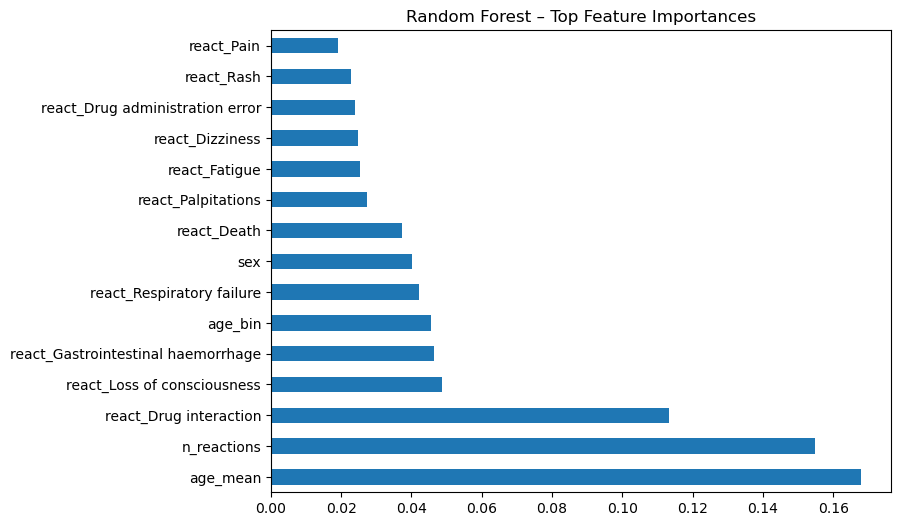

In [3]:
import matplotlib.pyplot as plt

rf_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_imp.head(15).plot(kind="barh", figsize=(8,6))
plt.title("Random Forest – Top Feature Importances")
plt.show()


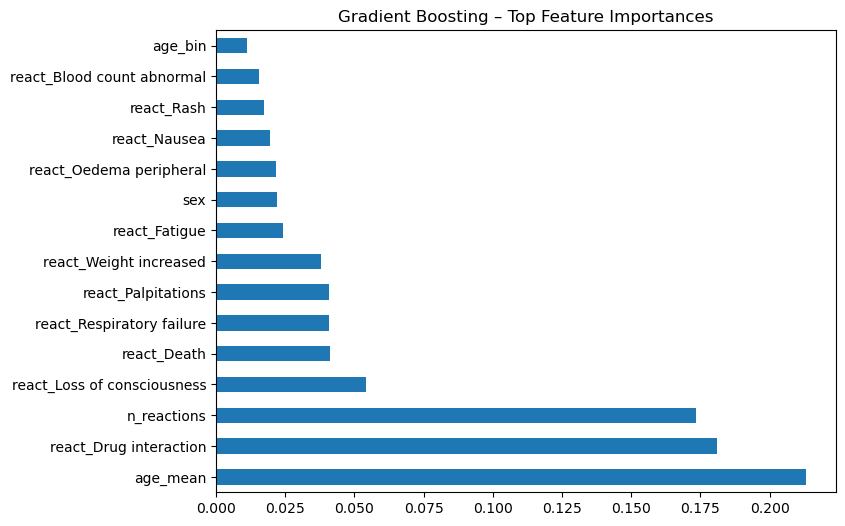

In [4]:
gb_imp = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
gb_imp.head(15).plot(kind="barh", figsize=(8,6))
plt.title("Gradient Boosting – Top Feature Importances")
plt.show()
